In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from innvariant_dgl.dataset import ConstructionSequenceDataset, graph_to_construction_sequence, construction_sequence_to_graph
from innvariant_dgl.dataset import generate_ba_model_construction_sequence
from innvariant_dgl.dataset import generate_ws_model_construction_sequence
from innvariant_dgl.dataset import generate_er_model_construction_sequence

In [2]:
ba_num_nodes = 50
ba_m = 3
print('Generating a construction sequences from the Barabasi-Albert process')
ds_ba_process = ConstructionSequenceDataset([generate_ba_model_construction_sequence(ba_num_nodes, ba_m) for _ in range(5000)])
print('Generating a construction sequences from bfs-search of an Barabasi-Albert generated graph')
ds_ba_bfs = ConstructionSequenceDataset([graph_to_construction_sequence(nx.barabasi_albert_graph(ba_num_nodes, ba_m), traversal='bfs') for _ in range(5000)])
print('Generating a construction sequences from dfs-search of an Barabasi-Albert generated graph')
ds_ba_dfs = ConstructionSequenceDataset([graph_to_construction_sequence(nx.barabasi_albert_graph(ba_num_nodes, ba_m), traversal='dfs') for _ in range(5000)])
print('Done')

Generating a construction sequences from the Barabasi-Albert process
Generating a construction sequences from bfs-search of an Barabasi-Albert generated graph
Generating a construction sequences from dfs-search of an Barabasi-Albert generated graph
Done


In [3]:
ws_num_nodes = 50
ws_k = 3
ws_p = 0.1
print('Generating a construction sequences from the Barabasi-Albert process')
ds_ws_process = ConstructionSequenceDataset([generate_ws_model_construction_sequence(ws_num_nodes, ws_k, ws_p) for _ in range(5000)])
print('Generating a construction sequences from bfs-search of an Barabasi-Albert generated graph')
ds_ws_bfs = ConstructionSequenceDataset([graph_to_construction_sequence(nx.watts_strogatz_graph(ws_num_nodes, ws_k, ws_p), traversal='bfs') for _ in range(5000)])
print('Generating a construction sequences from dfs-search of an Barabasi-Albert generated graph')
ds_ws_dfs = ConstructionSequenceDataset([graph_to_construction_sequence(nx.watts_strogatz_graph(ws_num_nodes, ws_k, ws_p), traversal='dfs') for _ in range(5000)])
print('Done')

Generating a construction sequences from the Barabasi-Albert process
Generating a construction sequences from bfs-search of an Barabasi-Albert generated graph
Generating a construction sequences from dfs-search of an Barabasi-Albert generated graph
Done


In [4]:
er_num_nodes = 50
er_p = 0.1
print('Generating a construction sequences from the Erdos-Renyi process')
ds_er_process = ConstructionSequenceDataset([generate_er_model_construction_sequence(er_num_nodes, er_p) for _ in range(5000)])
print('Generating a construction sequences from bfs-search of an Erdos-Renyi generated graph')
ds_er_bfs = ConstructionSequenceDataset([graph_to_construction_sequence(nx.gnp_random_graph(er_num_nodes, er_p), traversal='bfs') for _ in range(5000)])
print('Generating a construction sequences from dfs-search of an Erdos-Renyi generated graph')
ds_er_dfs = ConstructionSequenceDataset([graph_to_construction_sequence(nx.gnp_random_graph(er_num_nodes, er_p), traversal='dfs') for _ in range(5000)])
print('Done')

Generating a construction sequences from the Erdos-Renyi process
Generating a construction sequences from bfs-search of an Erdos-Renyi generated graph
Generating a construction sequences from dfs-search of an Erdos-Renyi generated graph
Done


In [5]:
datasets = {
    'ba_process': ds_ba_process,
    'ba_bfs': ds_ba_bfs,
    'ba_dfs': ds_ba_dfs,
    'ws_process': ds_ws_process,
    'ws_bfs': ds_ws_bfs,
    'ws_dfs': ds_ws_dfs,
    'er_process': ds_er_process,
    'er_bfs': ds_er_bfs,
    'er_dfs': ds_er_dfs,
}

In [6]:
lengths = {name: [len(seq) for seq in datasets[name]] for name in datasets}

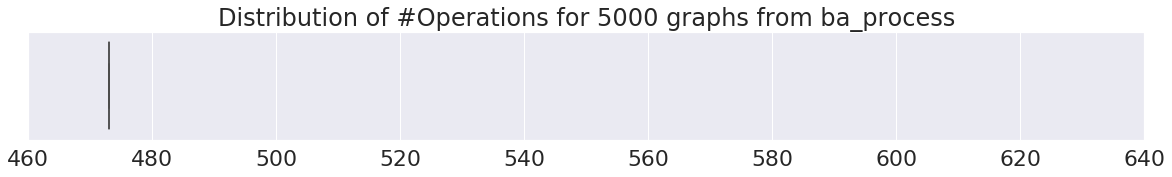

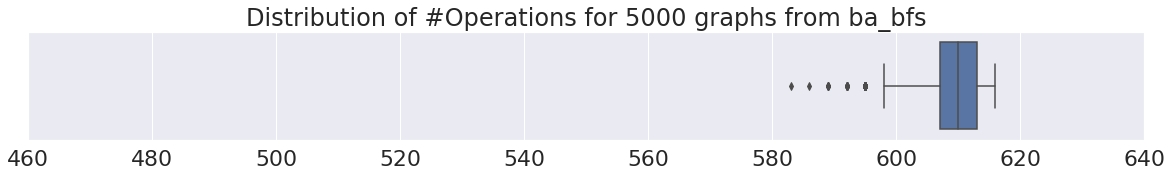

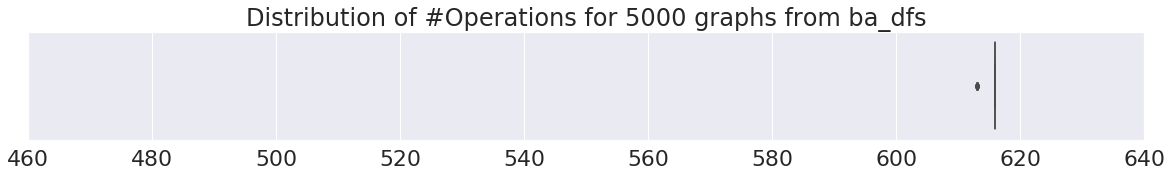

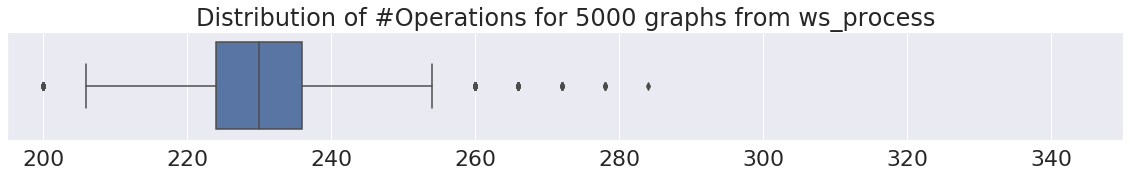

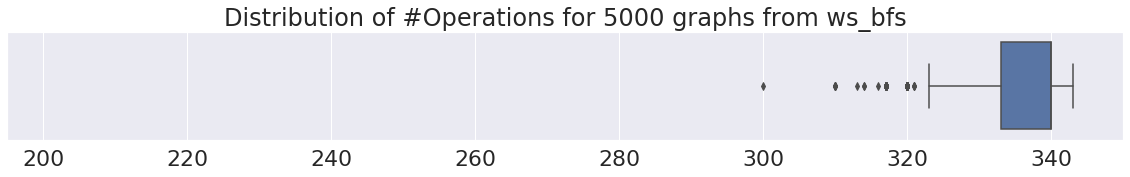

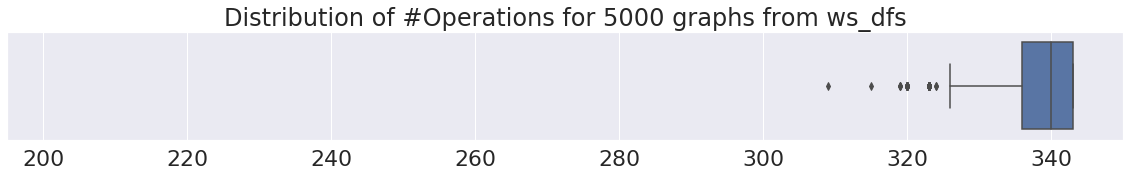

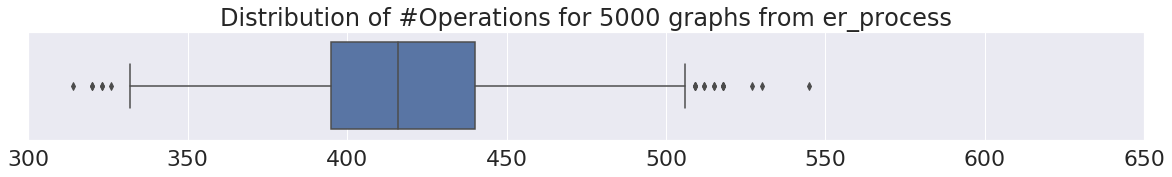

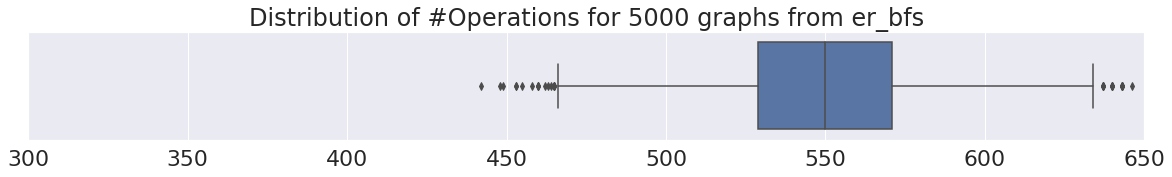

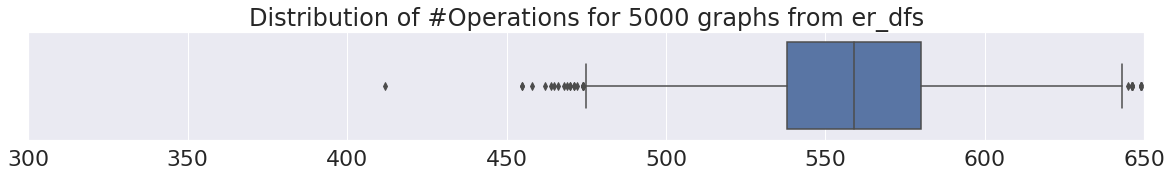

In [8]:
sns.set(style="whitegrid")
sns.set(font_scale=2)

for name in datasets:
    plt.figure(figsize=(20,2))
    ax = sns.boxplot(lengths[name])
    if 'er_' in name:
        ax.set(xlim=(300, 650))
    elif 'ba_' in name:
        ax.set(xlim=(460, 640))
    elif 'ws_' in name:
        ax.set(xlim=(195, 350))
    ax.set_title('Distribution of #Operations for {num} graphs from {name}'.format(num=len(datasets[name]), name=name))
    plt.show()